In [30]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

In [31]:
df = pd.read_csv('SMILES.csv', header=0)
df

,PDB id,Model,SMILES
0,1m17,GLDM,OCCc1nc2cc(-c3ccc(-c4ccccc4-c4ccc(O)c(NC5=CCNc...
1,1m17,BiAAE,Cc1cc(C)c(C2CCCN(C(=O)C3CCN(C)C(=O)C3)CC2)nn1
2,1m17,Reference,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
3,6hsk,GLDM,CC(C)OC(CO)COc1ccc(-n2c(Oc3cccc(-c4ccc(-c5ccc(...
4,6hsk,BiAAE,COc1ccc(-c2cc(CCNC(=O)C3CCCO3)cc(=O)[nH]2)cc1
5,6hsk,Reference,Cn1cc(CNCC2CCN(c3ncc(C(=O)NO)cn3)CC2)c2ccccc21
6,7zzs,GLDM,CCCOc1ccc(CNC(=O)CNC(=O)c2nc(-c3ccccc3)oc2CN(C...
7,7zzs,BiAAE,Cc1cc(NC(=O)C(C)NC(=O)c2cccc(C(N)=O)c2)ccc1O
8,7zzs,Reference,O=C(CCCCCCC(=O)Nc1ccccc1)NO


In [32]:
smiles = df['SMILES'].to_list()
smiles

['OCCc1nc2cc(-c3ccc(-c4ccccc4-c4ccc(O)c(NC5=CCNc6ccc(O)cc65)c4)cc3)ccc2nc1-c1ccc(O)cc1',
 'Cc1cc(C)c(C2CCCN(C(=O)C3CCN(C)C(=O)C3)CC2)nn1',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'CC(C)OC(CO)COc1ccc(-n2c(Oc3cccc(-c4ccc(-c5ccc(CC(=O)Nc6ccc(-c7cccnc7)cc6)cn5)cc4)c3)nc3ccccc3c2=O)cc1',
 'COc1ccc(-c2cc(CCNC(=O)C3CCCO3)cc(=O)[nH]2)cc1',
 'Cn1cc(CNCC2CCN(c3ncc(C(=O)NO)cn3)CC2)c2ccccc21',
 'CCCOc1ccc(CNC(=O)CNC(=O)c2nc(-c3ccccc3)oc2CN(C)Cc2cnc(NC=O)nc2C(F)(F)F)cc1',
 'Cc1cc(NC(=O)C(C)NC(=O)c2cccc(C(N)=O)c2)ccc1O',
 'O=C(CCCCCCC(=O)Nc1ccccc1)NO']

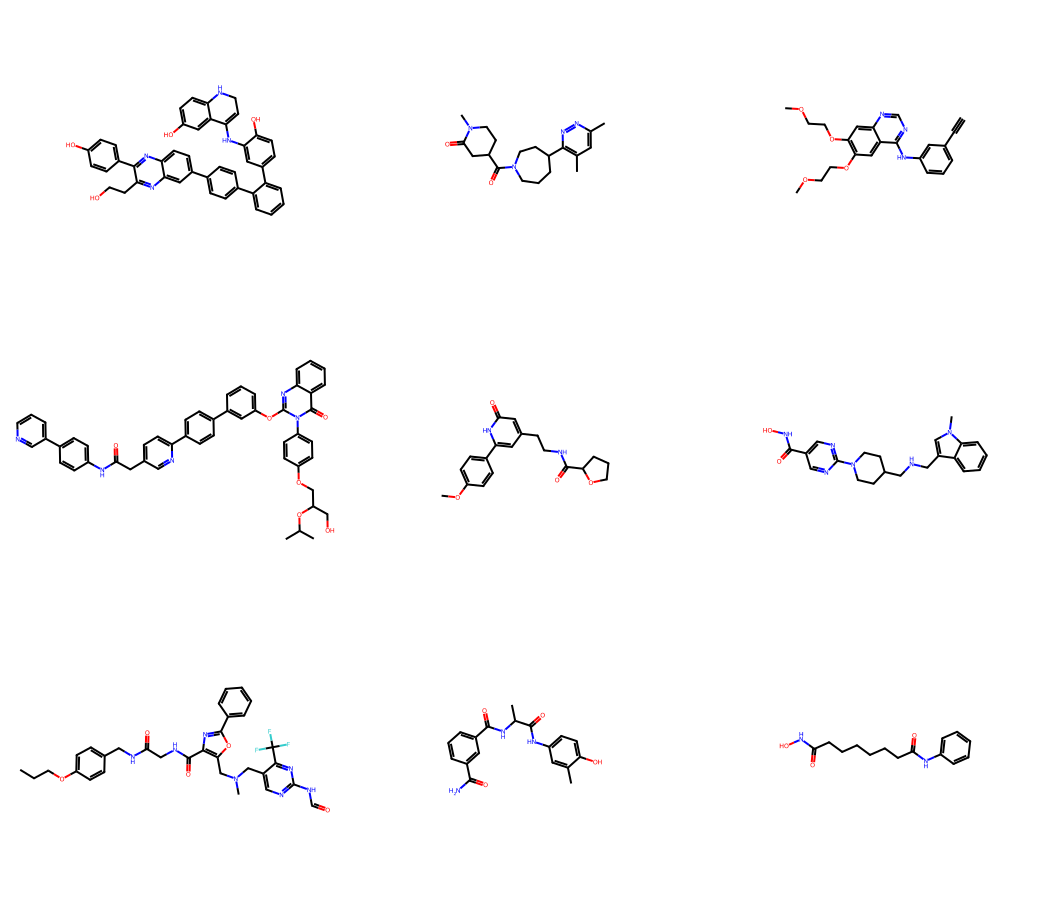

In [33]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, subImgSize=(350,300), maxMols = 15, molsPerRow=3)

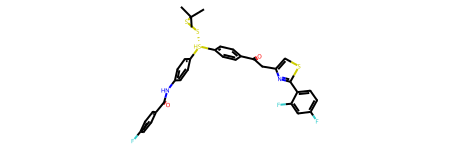

In [20]:
with Chem.SDMolSupplier('ligand/aae/Cn1cc(CNCC2CCN(c3ncc(C(=O)NO)cn3)CC2)c2ccccc21/CC(C)(C)SS[SH](c1ccc(NC(=O)c2ccc(F)cc2)cc1)c1ccc(C(=O)Cc2csc(-c3ccc(F)cc3F)n2)cc1.sdf')as suppl:
    m_6hsk = suppl[0]
m_6hsk

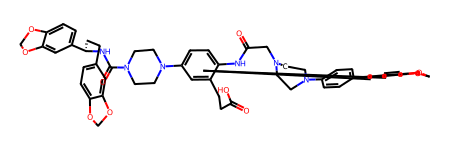

In [32]:
with Chem.SDMolSupplier('ligand/aae/O=C(CCCCCCC(=O)Nc1ccccc1)NO/O=C(O)CCc1cc(N2CCN(C(=O)NC(CCc3ccc4c(c3)OCO4)c3ccc4c(c3)OCO4)CC2)ccc1NC(=O)CN1CCN(c2ccc(-c3ccc4c(c3)OCO4)cc2)CC1.sdf')as suppl:
    m_7zzs = suppl[0]
m_7zzs

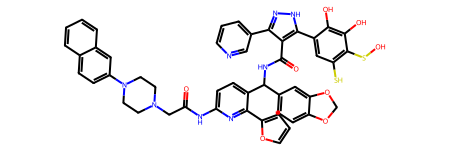

In [51]:
m_7zzs2 = Chem.MolFromSmiles('O=C(CN1CCN(c2ccc3ccccc3c2)CC1)Nc1ccc(C(NC(=O)c2c(-c3cccnc3)n[nH]c2-c2cc(S)c(SO)c(O)c2O)c2ccc3c(c2)OCO3)c(-c2ccco2)n1')
m_7zzs2

## mols with chiral centers

In [14]:
opts = StereoEnumerationOptions(tryEmbedding=True, unique=True)

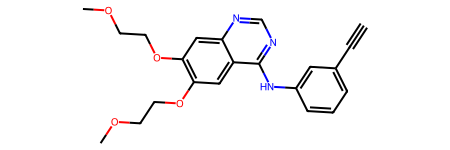

In [28]:
m = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')
m

['C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1']


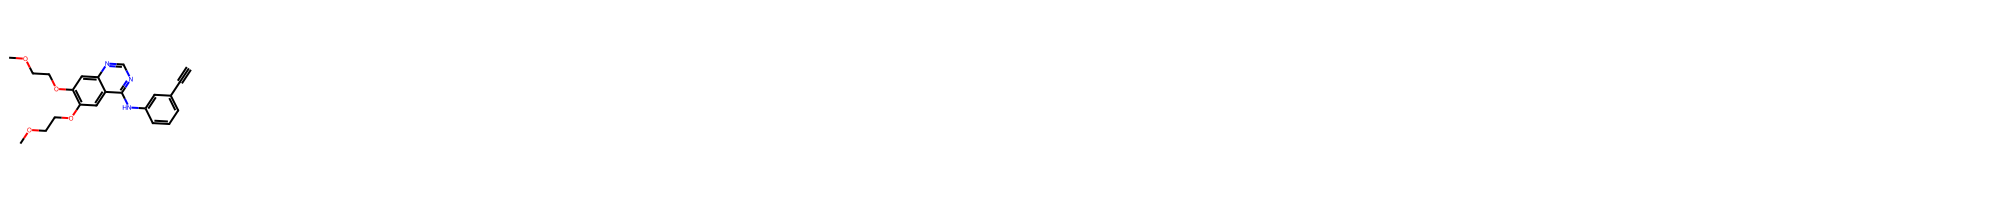

In [29]:
iso = tuple(EnumerateStereoisomers(m, options=opts))
iso_smiles = [Chem.MolToSmiles(i) for i in iso]
print(iso_smiles)

# isomers = [Chem.AddHs(i) for i in isomers]
# print(len(isomers))
# for i in isomers:
#     AllChem.EmbedMolecule(i, randomSeed=2023)

isomers = [Chem.MolFromSmiles(smi) for smi in iso_smiles]
Draw.MolsToGridImage(isomers, subImgSize=(200,200), maxMols = 15, molsPerRow=10)

In [20]:
with Chem.SDMolSupplier('ligand/biaae/C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1/Cc1cc(C)c(C2CCCN(C(=O)C3CCN(C)C(=O)C3)CC2)nn1.sdf')as suppl:
    m_sdf = suppl[0]
smi = Chem.MolToSmiles(m_sdf)
smi

'Cc1cc(C)c([C@H]2CCCN(C(=O)[C@H]3CCN(C)C(=O)C3)CC2)nn1'

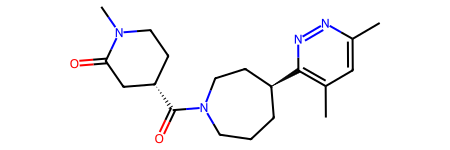

In [21]:
mol = Chem.MolFromSmiles(smi)
mol

In [24]:
def check_iso(filepath):
    with Chem.SDMolSupplier(filepath)as suppl:
        m_sdf = suppl[0]
    smi = Chem.MolToSmiles(m_sdf)
    mol = Chem.MolFromSmiles(smi)
    return mol

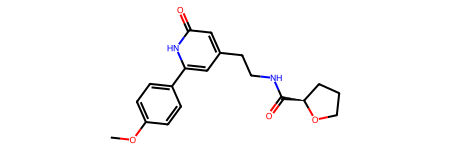

In [25]:
filepath = 'ligand/biaae/Cn1cc(CNCC2CCN(c3ncc(C(=O)NO)cn3)CC2)c2ccccc21/COc1ccc(-c2cc(CCNC(=O)C3CCCO3)cc(=O)[nH]2)cc1.sdf'
mol = check_iso(filepath)
mol

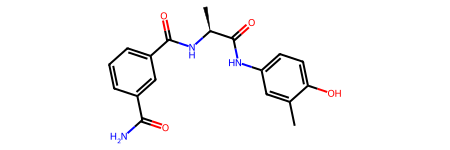

In [26]:
mol = check_iso('ligand/biaae/O=C(CCCCCCC(=O)Nc1ccccc1)NO/Cc1cc(NC(=O)C(C)NC(=O)c2cccc(C(N)=O)c2)ccc1O.sdf')
mol